In [20]:
#Needed to install opencv on the notebooks python environment, it's not using my pycharm environment.
#pip install opencv-python

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
#used to shuffle the datasets since im reading from sepcified folders classifying the data
#the first 300 or so are normal the rest wold be Pneumonia hard to learn.
import random 

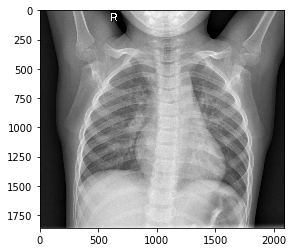

[[ 22  24  24 ...  96  94  93]
 [ 23  24  24 ...  97  94  92]
 [ 24  24  23 ...  99  96  94]
 ...
 [ 49  50  48 ... 119 119 119]
 [ 50  52  53 ... 123 124 123]
 [ 52  53  54 ... 129 128 127]]


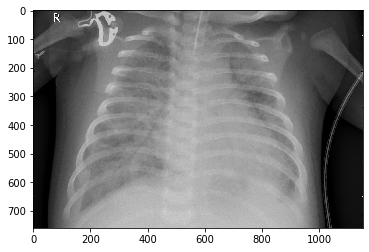

[[19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 ...
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]]


In [22]:
dirs = "chest_xray/train"

categories = ["NORMAL", "PNEUMONIA"]

for category in categories:
    path = os.path.join(dirs, category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    
    print(img_array)
        

<h2 style="color:Tomato;">
Cool I can see an image, one without Pneumonia and with with pneumonia, I noticed immediately that  the images are not the same size and I think I can fix that by resizing each of them as they are read. For the sake of learning I'll repaste the loop above just adding onto it</h1>

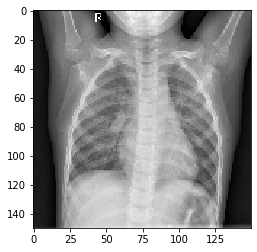

[[ 22  24  24 ...  96  94  93]
 [ 23  24  24 ...  97  94  92]
 [ 24  24  23 ...  99  96  94]
 ...
 [ 49  50  48 ... 119 119 119]
 [ 50  52  53 ... 123 124 123]
 [ 52  53  54 ... 129 128 127]]


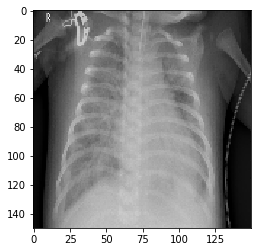

[[19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 ...
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]]


In [23]:
'''
Initial imageSize attempt was 800 * 800 sized images, but that was too much computation for this laptop.
'''
imageSize = 150 

for category in categories:
    path = os.path.join(dirs, category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img_array, (imageSize, imageSize))
        plt.imshow(resized, cmap="gray")
        plt.show()
        break
    
    print(img_array)
    

<h1 style="color:Tomato;">Nice! Now they images will all be 150x150, I tried 800x800 erlier and ran into some serious slowdown when I tried to normalize the entire dataset (dividing every index of each image array by 255)</h1>

In [24]:
train = []
categories = ["NORMAL", "PNEUMONIA"]
dirs = "chest_xray/train"
imageSize = 150 
#My labels on the training data will be done with the indexing of our categories above 0=Normal, 1 = Pneumonia.

for category in categories:
    path = os.path.join(dirs, category)
    classification = categories.index(category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img_array, (imageSize, imageSize))
        train.append([resized, classification])
        
print("Printing first image as an array")
print(train[0])

print("Number of images in training set:", len(train))

Printing first image as an array
[array([[ 23,  18,  15, ...,  94,  98,  94],
       [ 23,  20,  17, ...,  93,  94,  94],
       [ 20,  21,  19, ...,  93,  92,  93],
       ...,
       [ 28,  29,  27, ...,  38,  41,  39],
       [ 30,  29,  28, ...,  66,  64,  65],
       [ 40,  42,  43, ..., 101, 100, 101]], dtype=uint8), 0]
Number of images in training set: 5216


<h2 style="color:Tomato;">
Cool, we see our array of the image and to the right the "0" is indicating this is a Normal image not Penumonia. I'm going to make our test set and validation set as well at this time. I re-stated the variables because I'm not entirely sure how notebooks work yet.</h2>

In [25]:
test = []
dirs = "chest_xray/test"
categories = ["NORMAL", "PNEUMONIA"]
imageSize = 150 


for category in categories:
    path = os.path.join(dirs, category)
    classification = categories.index(category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img_array, (imageSize, imageSize))
        test.append([resized, classification])
print("Printing the first image as an array")  
print(test[0])
print("Number of images in our test set", len(test))

Printing the first image as an array
[array([[36, 32, 32, ..., 32, 35, 33],
       [30, 30, 30, ..., 30, 29, 31],
       [34, 32, 32, ..., 32, 32, 32],
       ...,
       [31, 27, 29, ..., 30, 33, 35],
       [30, 29, 26, ..., 34, 34, 32],
       [29, 28, 29, ..., 31, 29, 36]], dtype=uint8), 0]
Number of images in our test set 624


<h2 style="color:DodgerBlue;"> The Validation set will be used when we fit the neural network, it's just a few images that will be tested on each epoch (Each complete run of our NN as it's learning)</h2>

In [26]:
val = []
dirs = "chest_xray/val"
categories = ["NORMAL", "PNEUMONIA"]
imageSize = 150 


for category in categories:
    path = os.path.join(dirs, category)
    classification = categories.index(category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img_array, (imageSize, imageSize))
        val.append([resized, classification])
print("Printing first image as an array")    
print(val[0])
print("Number of images in validation set", len(val))

Printing first image as an array
[array([[ 2, 11, 23, ..., 87, 70, 65],
       [ 0,  7, 19, ..., 74, 77, 66],
       [ 2,  8, 15, ..., 78, 73, 61],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
Number of images in validation set 16


<h2 style="color:DodgerBlue;">I noticed that the for loops here will read down and classify the entire folder of either Normal or Pneumonia and append it to the list, so the first ton of the entries will be Normal and the rest pneumonia for us, this is going to affect the learning from the model (I assume?) since atleast in my mind you'd see 50 entities classify them all as the entity you've seen so far until you hit a new entity type halfway into the training set. So I'll import random and shuffle the training dataset so that the NN will not be stuck learning from one type for 2k tries or so. (You can also shuffle the data within the parameters they allow for a NN model being fit </h2>

In [27]:
random.shuffle(train)


<h3 style="color:DodgerBlue;">Now I can begin with the final part of data manipulation. Here we create the seperate lists that hold the information for each Dataset train_X will be the image array, and train_y will be the feature(0 or 1)</h3>

In [28]:
train_X = [] 
train_y = [] 

test_X = [] 
test_y = [] 

val_X = []
val_y = []

for entity, label in train:
    train_X.append(entity)
    train_y.append(label)
    
for entity, label in test:
    test_X.append(entity)
    test_y.append(label)

for entity, label in val:
    val_X.append(entity)
    val_y.append(label)

print("Done!")

Done!


In [29]:
#print(train_X[:2])
#print(test_X[:2])
#print(val_X[:2])
print("Done!")

Done!


<h2 style="color:Tomato;">This all looks good! I tested out using just test_X as a list and it did not work out, looking at the keras documentation and stack overflow it looks like they need to actually be complete numpy arrays, the y sets can remain a list judging by my testing earlier.</h2>

In [30]:
# this was initialized earlier but im just being sure it's going to work right in the notebook 
imageSize = 150 

#This should grab all (-1 is a grab all) of the arrays resize them to the regular size but make test_X an nparray
#According to the reshape documentation 1 should maintain our grayscale.
train_X = np.array(train_X).reshape(-1,imageSize, imageSize, 1)
train_y = np.array(train_y)

test_X = np.array(test_X).reshape(-1,imageSize, imageSize, 1)
test_y = np.array(test_y)

val_X = np.array(val_X).reshape(-1,imageSize, imageSize, 1)
val_y = np.array(val_y)
print("Done!")

Done!


tensorflow was not on this python environment so I did a quick pip install on first run in this notebook.


In [31]:
#pip install tensorflow

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD

print("Done!")

Done!


<h2 style="color:MediumSeaGreen;">
Why these layer types? Well we are workin with arrays of numbers that are as images, Conv2D and MaxPooling2D are standard here, Activation will be Relu and then sigmoid the flatten will be used just before the dense layer due to the Dense layers requirements of working with 1D Data, From what I was reading about NN architecture the Dropout will hopefully help resolve some overfitting errors.  the Dense layer will be used at the end of our NN  to give give us final predictions before back propogation begins.
<br>
<br>
I can rescale our data further actually to give us smaller numbers as well. since the pixel data is maxed at 255 I think we could normalize the data and give us n/255 data sizes, since we are working with numpy arrays this command will do it across all, this will take a couple minutes on my computer to complete. </h2>

In [33]:
train_X = train_X/255.0
print("Done!")

Done!


In [34]:
test_X = test_X/255.0
print("Done!")


Done!


In [35]:
val_X = val_X/255.0
print("Done!")

Done!


In [36]:
#print("Train")
#train_X[0]
#print("Test")
#test_X[0]
#print("Val")
#val_X[0]

In [37]:
train_X.shape

(5216, 150, 150, 1)

In [40]:
# Model type is sequential, standard here it seems.
model = Sequential()
# Optimizer would be 'adam' or any of the other default given ones
# but using the actual SGD Stochastic Gradient Descent optimizer allows us to tweak learning rate and momentum
# However someone feels is necessary.
opt = SGD(lr=.01, momentum=.9)

'''
I started out the NN activation layer with a Batch Normilization technique.
After a few attempts atthis I noticed that Batch Normilization was effective and improved the success rate.

Then I started using Conv2D Layers to begin working with the image.
since the image is still pretty large (150x150) I gave the first one a larger stride of 5,5 everything else was 3,3

I added dropout layers to help with overfitting that was becoming an annoyance.


'''

model.add(BatchNormalization(input_shape = (150,150,1)))
model.add(Conv2D(32, (5,5), activation="relu"))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(Dropout(.2))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(Dropout(.2))


'''
Finally finishing this up with a Dense layer to give us our result of 0 or 1.
In order to use a dense layer the data must be 1d so we use a Flatten layer to "flatten" the images.
'''
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

'''
Here we compile model, loss= Binary_CE, The outputs of this are 0 or 1 so I figured Binary CE was a good start
The optimizer is the SGD optimizer wemade erlier, but 'adam' and such probably work fine too, I didn't tweak much.
Metrics being accuracy will let us see accuracy metrics as we fit the model.
'''

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])

''' 
Finally fitting the model with our training data, batch size set to 30 for my computers sake
Validation_split is .1  higher is less effective from what I've seen, but it may be way more related to dataset size.
Doing 4 epochs should only take a decade on this computer.
The documentation allows me to add a validation_data =[X,y] I'm guessing we could fit AND predict the model.
But I'm splitting that up just incase it's not what I think and I don't want to break the model (right now).
'''

model.fit(train_X, train_y, batch_size=30, validation_data= (val_X, val_y), epochs=4, shuffle=True)


Train on 5216 samples, validate on 16 samples
Epoch 1/4
  90/5216 [..............................] - ETA: 31:46 - loss: 10.2510 - accuracy: 0.4167

KeyboardInterrupt: 

<h2 style="color:MediumSeaGreen;">
This was running Extremely Slow, so I did a command kill on it. Below is a prediction I did after letting this model compile for a couple hours on a Saturday lol, barely 80% I think it can be kind of difficult to distinguish from xray image to xray image which one has Pneumonia. There is most likely error on my end however, involving the image size as well as the slowness of my computers. The time it takes to refit makes alterations extremely tedious.</h2>


In [63]:
prediction = model.evaluate(test_X, test_y)



624/624 [==============================] - 5s 9ms/sample - loss: 0.7658 - accuracy: 0.7997


The model was signifigantly worse at predicting the test-set than when it was actively learning. I do think overfitting is an issue, but I don't  know where unfortunately I'll have to look for issues I've created.